k=1: Average Accuracy = 0.9529
k=2: Average Accuracy = 0.9451
k=3: Average Accuracy = 0.9647
k=4: Average Accuracy = 0.9569
k=5: Average Accuracy = 0.9529
k=6: Average Accuracy = 0.9686
k=7: Average Accuracy = 0.9608
k=8: Average Accuracy = 0.9608
k=9: Average Accuracy = 0.9608
k=10: Average Accuracy = 0.9725
k=11: Average Accuracy = 0.9569
k=12: Average Accuracy = 0.9529
k=13: Average Accuracy = 0.9686
k=14: Average Accuracy = 0.9686
k=15: Average Accuracy = 0.9608
k=16: Average Accuracy = 0.9647
k=17: Average Accuracy = 0.9490
k=18: Average Accuracy = 0.9529
k=19: Average Accuracy = 0.9373
k=20: Average Accuracy = 0.9451


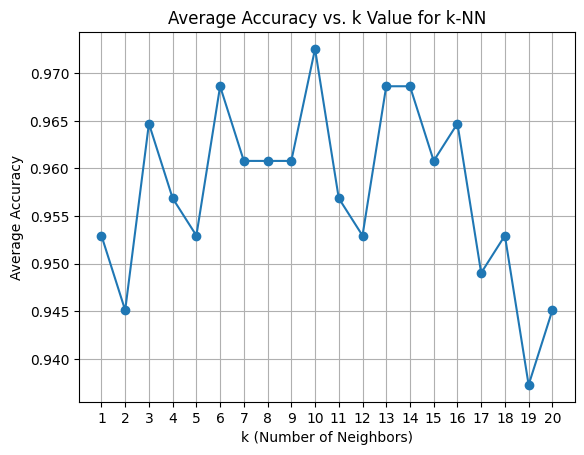

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
df = pd.read_csv(url, header=None)

# Add column names
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.columns = column_names

# Extract the features using column names
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

# Extract the labels using the column name
y = df['class'].values

# Initialize variables to store results
k_values = list(range(1, 21))
avg_accuracies = []

# Repeat k-NN for each k for at least five times
num_runs = 5

for k in k_values:
    accuracies = []
    for i in range(num_runs):
        # Split the data into training and testing sets
        samples = len(X)
        train_samples = int(samples * 0.66)
        array = np.arange(samples)
        np.random.shuffle(array)
        X_train = X[array[:train_samples]]
        y_train = y[array[:train_samples]]
        X_test = X[array[train_samples:]]
        y_test = y[array[train_samples:]]
        
        # Create a KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Fit the classifier to the training data
        knn.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = knn.predict(X_test)
        
        # Calculate accuracy and append to the list of accuracies
        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)
    
    # Calculate and store the average accuracy for k
    avg_accuracy = np.mean(accuracies)
    avg_accuracies.append(avg_accuracy)

# Print the average accuracies for each k value
for i in range(len(k_values)):
    k = k_values[i]
    avg_accuracy = avg_accuracies[i]
    print(f'k={k}: Average Accuracy = {avg_accuracy:.4f}')

# Plot the results as a line chart
plt.plot(k_values, avg_accuracies, marker='o', linestyle='-')
plt.title('Average Accuracy vs. k Value for k-NN')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

We believe some Ks have similar accuracys because we have a simple data set. In these cases a large range of K values may produce similar results because the closest neighbors are consisently the same independent of the K value.